In [127]:
import cartopy
import cartopy.io.shapereader as shpreader
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import pylab
from random import random
%matplotlib inline
pylab.rcParams['figure.figsize'] = (16.0, 9.0)

In [164]:
cmap=plt.get_cmap('RdYlGn')

def plot_map(country_list):
    ax = plt.axes(projection=cartopy.crs.PlateCarree())
    ax.add_feature(cartopy.feature.OCEAN)
    ax.set_extent([-180, 180, -90, 90])

    shpfilename = shpreader.natural_earth(resolution='110m', category='cultural', name='admin_0_countries')
    reader = shpreader.Reader(shpfilename)
    countries_on_map = reader.records()

    for country_on_map in countries_on_map:
        color = (1,1,1)
        for country_in_list in country_list:
            if country_on_map.attributes['name'] == country_in_list.name:
                color = cmap(random())
        color_country(ax, color, country_on_map)

    plt.show()

In [165]:
def color_country(ax, color, country):
    ax.add_geometries(country.geometry, ccrs.PlateCarree(),
                        facecolor=color)

In [166]:
class Country():
    def __init__(self, name):
        self.name = name

In [167]:
countries = []
for name in ['Germany', 
             'United States', 
             'India', 
             'Australia', 
             'Sudan', 
             'Norway', 
             'Argentina', 
             'Bolivia', 
             'Libya', 
             'Italy']:
    countries.append(Country(name))

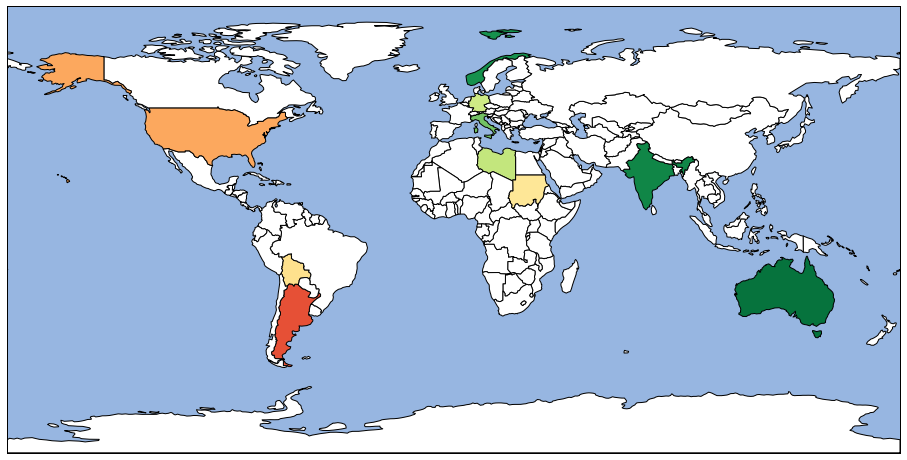

In [168]:
plot_map(countries)